In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the diamond dataset from csv
df = pd.read_csv('Diamond Price Prediction.csv')
df.head(10)

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


📄 Dataset Description

The dataset contains information about 53,940 diamonds, including their physical attributes and pricing. Each row represents a single diamond with the following features:

**Carat (Weight of Diamond):** Numeric value representing the weight of the diamond.

**Cut (Quality):** Categorical feature indicating the quality of the diamond's cut (e.g., Ideal, Premium, Good, etc.).

**Color:** Categorical feature representing the diamond color grade (from D – best, to J – worst).

**Clarity:** Categorical feature describing the clarity of the diamond (e.g., SI2, VS1, IF, etc.).

**Depth:** Total depth percentage (z / mean(x, y)).

**Table:** Width of the top of the diamond relative to the widest point.

**Price (in US dollars):** Target variable indicating the diamond's price.

**X (Length), Y (Width), Z (Depth):** Physical dimensions of the diamond in millimeters.

In [4]:
df.shape

(53940, 10)

In [5]:
df.isna().sum() #no null values

,0
Carat(Weight of Daimond),0
Cut(Quality),0
Color,0
Clarity,0
Depth,0
Table,0
Price(in US dollars),0
X(length),0
Y(width),0
Z(Depth),0


# Exploratory Data Analysis

<Axes: xlabel='Cut(Quality)', ylabel='Price(in US dollars)'>

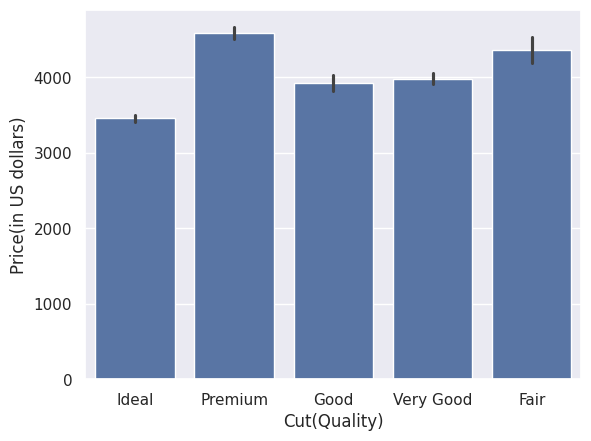

In [6]:
#visualize relationship between diamond cut quality and price
sns.barplot(data=df, x="Cut(Quality)", y="Price(in US dollars)")


Premium Quality has the highest price for diamond

<Axes: xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

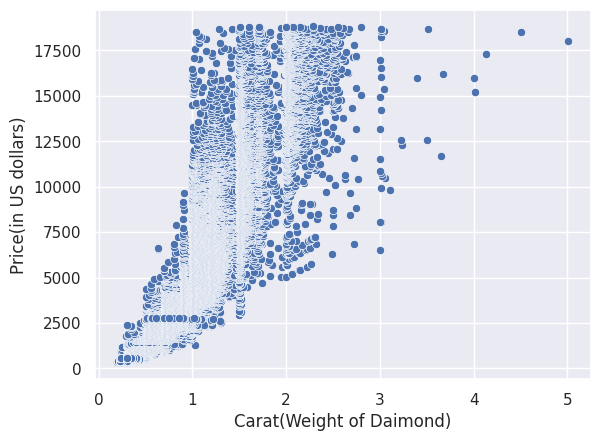

In [7]:
#visualize relationship between diamond carat weight and price
sns.scatterplot(data=df, x="Carat(Weight of Daimond)", y="Price(in US dollars)")

<Axes: xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

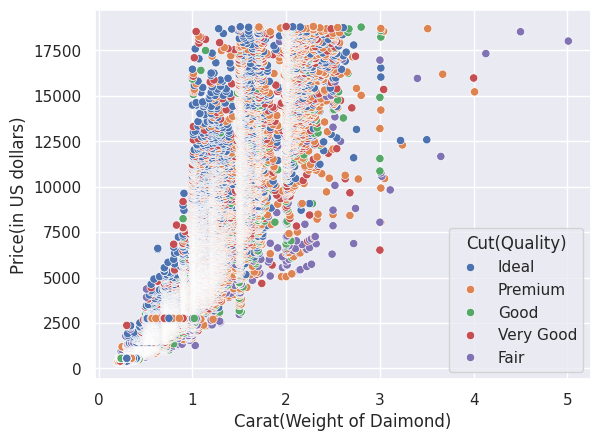

In [8]:
#visualize relationship between diamond carat weight, cut quality, and price
sns.scatterplot(data=df, x="Carat(Weight of Daimond)", y="Price(in US dollars)", hue="Cut(Quality)", palette="deep")

<Axes: xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

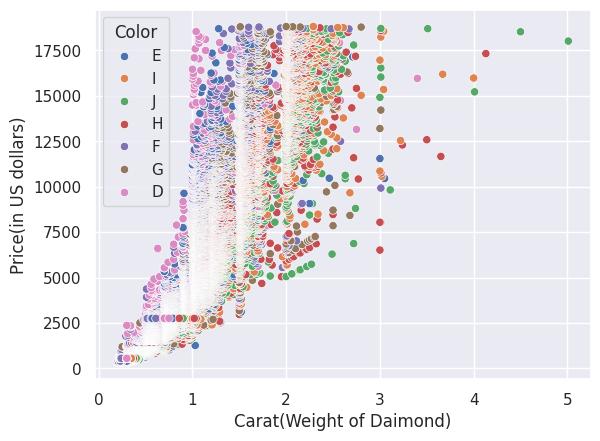

In [9]:
#visualize relationship between diamond carat weight, color, and price
sns.scatterplot(data=df, x="Carat(Weight of Daimond)", y="Price(in US dollars)", hue="Color", palette="deep")

<Axes: xlabel='Color', ylabel='Price(in US dollars)'>

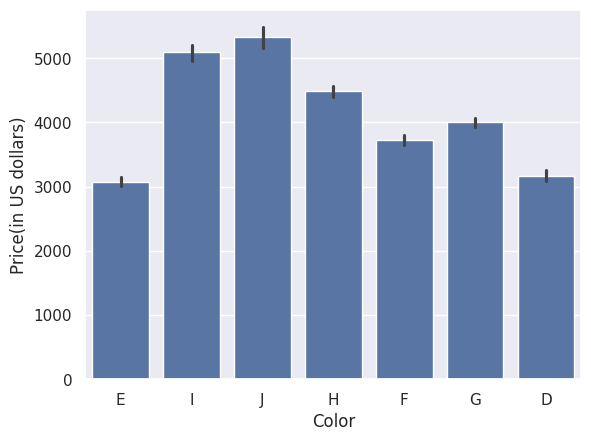

In [10]:
#visualize relationship between diamond color and price
sns.barplot(data=df, x="Color", y="Price(in US dollars)")

<Axes: xlabel='Clarity', ylabel='Price(in US dollars)'>

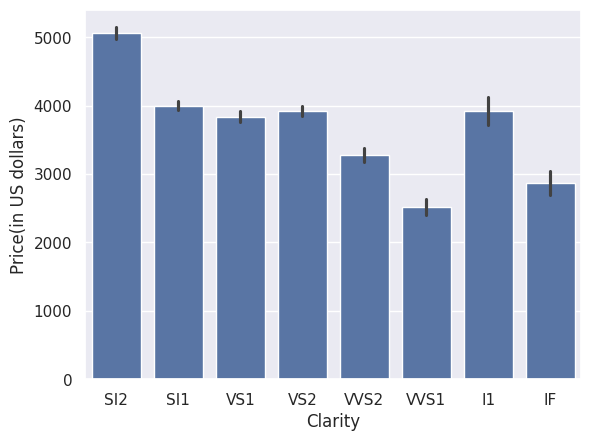

In [11]:
#visualize relationship between diamond clarity and price
sns.barplot(data=df, x="Clarity", y="Price(in US dollars)")


SI2 has the highest clarity price

# Data Preprocessing

In [12]:
#examine data types for each feature
df.dtypes

,0
Carat(Weight of Daimond),float64
Cut(Quality),object
Color,object
Clarity,object
Depth,float64
Table,float64
Price(in US dollars),int64
X(length),float64
Y(width),float64
Z(Depth),float64


In [13]:
#examine unique values for the Cut(Quality) feature
df['Cut(Quality)'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [14]:
#examine unique values for the Color feature
df['Color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [15]:
#examine unique values for the Clarity feature
df['Clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [16]:
#use label encoder to convert categorical variables to numerical
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Cut(Quality)']= label_encoder.fit_transform(df['Cut(Quality)'])
df['Cut(Quality)'].unique()

array([2, 3, 1, 4, 0])

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Color']= label_encoder.fit_transform(df['Color'])
df['Color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Clarity']= label_encoder.fit_transform(df['Clarity'])
df['Clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

# Machine Learning Model Building

In [19]:
#split data into features and target variable
X = df.drop('Price(in US dollars)', axis=1)
y = df['Price(in US dollars)']

In [20]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Decision Tree Regressor

In [21]:
#create decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [22]:

#evaluate model performance using metrics
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 354.16439562476825
MSE is 524367.0390480163
R2 score is 0.9669204129976543
RMSE score is 724.1319210254553


# Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [24]:

from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 266.16424879973925
MSE is 294799.9292444162
R2 score is 0.9814026069879784
RMSE score is 542.9548132620395



**R2 Score Comparison :**

Decision Tree Regressor (model1) : 96.69 %

Random Forest Regressor (model2) : 98.14 %


> lets try other models to get improvement





In [31]:
from xgboost import XGBRegressor

# Create and train XGBoost Regressor
xgb = XGBRegressor(random_state=0, n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
rmse = math.sqrt(mse)

print("XGBoost Results:")
print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)
print('RMSE:', rmse)


XGBoost Results:
MAE: 274.3878479003906
MSE: 288425.15625
R2 Score: 0.9818047285079956
RMSE: 537.0522844658609


In [27]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [32]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Create and train CatBoost Regressor
cat = CatBoostRegressor(verbose=0, random_state=0, iterations=1000, learning_rate=0.05, depth=6)
cat.fit(X_train, y_train)

# Predict
y_pred_cat = cat.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_cat)
mse = mean_squared_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)
rmse = math.sqrt(mse)

print("CatBoost Results:")
print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)
print('RMSE:', rmse)

CatBoost Results:
MAE: 273.9687521270624
MSE: 282121.8815894675
R2 Score: 0.9822023990214044
RMSE: 531.1514676525591


 **CATBOOST GIVES THE BEST R SQUARED**

In [30]:
import pickle

with open("catboost_model.pkl", "wb") as f:
    pickle.dump(cat, f)